# Initial imports
import os
import requests
import numpy as np
import pandas as pd
from pathlib import Path
import hvplot.pandas
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [1]:
import pandas as pd
from pathlib import Path

In [2]:
trading_df = pd.read_csv(
    Path("Stochastic Oscillator and SMA based Algorithmic Trading Analyser/buysell.csv"), 
    index_col="Unnamed: 0", 
    infer_datetime_format=True, 
    parse_dates=True
)
# Display sample data
trading_df.head()

,AMZN,AMZN_k_period_min,AMZN_k_period_max,AMZN_k_component_fast,AMZN_d_component_slow,AMZN_sma_fast,AMZN_sma_slow,AMZN_stoch_oscl_exit,AMZN_stoch_oscl_signal,%K_80,%K_20
Unnamed: 0,,,,,,,,,,,
2017-10-26,972.54,965.47,1008.99,16.245404,42.277520,987.306,989.094167,-1,-1,94,25
2017-10-27,1100.99,966.34,1100.99,100.000000,44.712585,997.061,997.926667,0,-1,94,25
2017-10-30,1110.85,966.34,1110.85,100.000000,50.216924,1007.512,1007.075000,1,0,94,25
2017-10-31,1105.67,966.34,1110.85,96.415473,56.789303,1017.180,1015.594167,0,0,94,25
2017-11-01,1103.50,966.34,1110.85,94.913847,67.795536,1027.831,1023.690833,0,0,94,25


In [3]:
trading_df["actual_returns"] = trading_df["AMZN"].pct_change()

In [4]:
trading_df.head()

,AMZN,AMZN_k_period_min,AMZN_k_period_max,AMZN_k_component_fast,AMZN_d_component_slow,AMZN_sma_fast,AMZN_sma_slow,AMZN_stoch_oscl_exit,AMZN_stoch_oscl_signal,%K_80,%K_20,actual_returns
Unnamed: 0,,,,,,,,,,,,
2017-10-26,972.54,965.47,1008.99,16.245404,42.277520,987.306,989.094167,-1,-1,94,25,NaN
2017-10-27,1100.99,966.34,1100.99,100.000000,44.712585,997.061,997.926667,0,-1,94,25,0.132077
2017-10-30,1110.85,966.34,1110.85,100.000000,50.216924,1007.512,1007.075000,1,0,94,25,0.008956
2017-10-31,1105.67,966.34,1110.85,96.415473,56.789303,1017.180,1015.594167,0,0,94,25,-0.004663
2017-11-01,1103.50,966.34,1110.85,94.913847,67.795536,1027.831,1023.690833,0,0,94,25,-0.001963


In [5]:
trading_df = trading_df.dropna()

In [6]:
trading_df = trading_df[['actual_returns','AMZN_k_component_fast','AMZN_d_component_slow','AMZN_sma_fast','AMZN_sma_slow']].copy()
display(trading_df.head())
display(trading_df.tail())

,actual_returns,AMZN_k_component_fast,AMZN_d_component_slow,AMZN_sma_fast,AMZN_sma_slow
Unnamed: 0,,,,,
2017-10-27,0.132077,100.000000,44.712585,997.061,997.926667
2017-10-30,0.008956,100.000000,50.216924,1007.512,1007.075000
2017-10-31,-0.004663,96.415473,56.789303,1017.180,1015.594167
2017-11-01,-0.001963,94.913847,67.795536,1027.831,1023.690833
2017-11-02,-0.008609,88.339907,75.205213,1038.571,1030.775000


,actual_returns,AMZN_k_component_fast,AMZN_d_component_slow,AMZN_sma_fast,AMZN_sma_slow
Unnamed: 0,,,,,
2021-09-09,-0.011456,88.093273,97.470973,3450.0030,3425.505000
2021-09-10,-0.004278,83.697895,95.142101,3465.4950,3439.200833
2021-09-13,-0.004158,79.444019,92.205533,3476.1860,3452.198333
2021-09-14,-0.001709,76.843829,89.686096,3479.0775,3463.413750
2021-09-15,0.007340,80.629139,86.958308,3479.3665,3473.941250


In [7]:
trading_df["signal"] = 0.0

In [8]:
trading_df.loc[(trading_df["actual_returns"] >= 0), "signal"] = 1
trading_df.loc[(trading_df["actual_returns"] < 0), "signal"] = -1

In [9]:
y = trading_df["signal"].copy()

In [10]:
display(trading_df.head())

,actual_returns,AMZN_k_component_fast,AMZN_d_component_slow,AMZN_sma_fast,AMZN_sma_slow,signal
Unnamed: 0,,,,,,
2017-10-27,0.132077,100.000000,44.712585,997.061,997.926667,1.0
2017-10-30,0.008956,100.000000,50.216924,1007.512,1007.075000,1.0
2017-10-31,-0.004663,96.415473,56.789303,1017.180,1015.594167,-1.0
2017-11-01,-0.001963,94.913847,67.795536,1027.831,1023.690833,-1.0
2017-11-02,-0.008609,88.339907,75.205213,1038.571,1030.775000,-1.0


In [12]:
X = trading_df[['AMZN_k_component_fast','AMZN_d_component_slow','AMZN_sma_fast','AMZN_sma_slow']].copy()

In [13]:
from pandas.tseries.offsets import DateOffset
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2017-10-27 00:00:00


In [15]:
X.index.max()

Timestamp('2021-09-15 00:00:00')

In [17]:
# Select the ending period for the training data with an offset of 43 months
training_end = X.index.min() + DateOffset(months=43)

# Display the training end date
print(training_end)

2021-05-27 00:00:00


In [18]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Display sample data
X_train.head()

,AMZN_k_component_fast,AMZN_d_component_slow,AMZN_sma_fast,AMZN_sma_slow
Unnamed: 0,,,,
2017-10-27,100.000000,44.712585,997.061,997.926667
2017-10-30,100.000000,50.216924,1007.512,1007.075000
2017-10-31,96.415473,56.789303,1017.180,1015.594167
2017-11-01,94.913847,67.795536,1027.831,1023.690833
2017-11-02,88.339907,75.205213,1038.571,1030.775000


In [19]:
 # Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Display sample data
X_test.head()

,AMZN_k_component_fast,AMZN_d_component_slow,AMZN_sma_fast,AMZN_sma_slow
Unnamed: 0,,,,
2021-05-27,51.668293,38.144197,3241.089,3227.125833
2021-05-28,46.868293,41.283592,3241.267,3233.130833
2021-06-01,48.168952,43.865126,3235.953,3237.851667
2021-06-02,69.061005,51.517458,3236.172,3238.853333
2021-06-03,29.638332,51.608018,3231.771,3231.865833


In [20]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
from sklearn import svm
from sklearn.metrics import classification_report

In [22]:
# Create the classifier model
svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.72      0.64      0.68       394
         1.0       0.74      0.81      0.78       507

    accuracy                           0.74       901
   macro avg       0.73      0.73      0.73       901
weighted avg       0.73      0.74      0.73       901



In [24]:
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [25]:
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.64      0.62      0.63        37
         1.0       0.66      0.68      0.67        40

    accuracy                           0.65        77
   macro avg       0.65      0.65      0.65        77
weighted avg       0.65      0.65      0.65        77



In [26]:
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["predicted_signal"] = testing_signal_predictions
predictions_df["actual_returns"] = trading_df["actual_returns"]
predictions_df["trading_algorithm_returns"] = predictions_df["actual_returns"] * predictions_df["predicted_signal"]
predictions_df.head()

,predicted_signal,actual_returns,trading_algorithm_returns
Unnamed: 0,,,
2021-05-27,1.0,-0.010146,-0.010146
2021-05-28,1.0,-0.002283,-0.002283
2021-06-01,1.0,-0.001870,-0.001870
2021-06-02,1.0,0.005055,0.005055
2021-06-03,-1.0,-0.014523,0.014523


<AxesSubplot:xlabel='Unnamed: 0'>

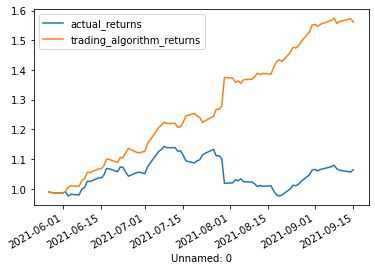

In [27]:
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

In [29]:
# RF Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [30]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [31]:
rf_predictions = rf_model.predict(X_test_scaled)

In [32]:
rf_testing_report = classification_report(y_test, rf_predictions)
print(rf_testing_report)

              precision    recall  f1-score   support

        -1.0       0.76      0.78      0.77        37
         1.0       0.79      0.78      0.78        40

    accuracy                           0.78        77
   macro avg       0.78      0.78      0.78        77
weighted avg       0.78      0.78      0.78        77



<AxesSubplot:xlabel='Unnamed: 0'>

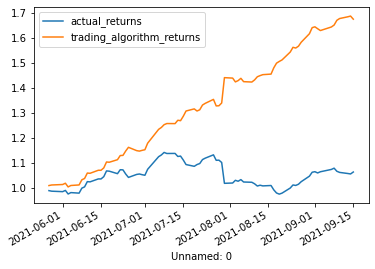

In [33]:
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["predicted_signal"] = rf_predictions
predictions_df["actual_returns"] = trading_df["actual_returns"]
predictions_df["trading_algorithm_returns"] = predictions_df["actual_returns"] * predictions_df["predicted_signal"]
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

In [42]:
# Gradiant Boosting
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=learning_rate,
        max_features=4,
        max_depth=4,
        random_state=0)
    model.fit(X_train_scaled,y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        model.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        model.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.869
Accuracy score (validation): 0.727

Learning rate:  0.1
Accuracy score (training): 0.937
Accuracy score (validation): 0.714

Learning rate:  0.25
Accuracy score (training): 0.996
Accuracy score (validation): 0.714

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.753

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.714

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.701



In [43]:
model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.5,
    max_features=4,
    max_depth=4,
    random_state=1)

# Fit the model
model.fit(X_train_scaled,y_train.ravel())

# Score the model
print("Accuracy score (training): {0:.3f}".format(
    model.score(
        X_train_scaled,
        y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    model.score(
        X_test_scaled,
        y_test)))

Accuracy score (training): 1.000
Accuracy score (validation): 0.740


In [44]:
gb_predictions = model.predict(X_test_scaled)

# Generate accuracy score for predictions using y_test
accuracy_score(y_test, gb_predictions)

0.7402597402597403

In [45]:
print(classification_report(y_test, gb_predictions))

              precision    recall  f1-score   support

        -1.0       0.79      0.62      0.70        37
         1.0       0.71      0.85      0.77        40

    accuracy                           0.74        77
   macro avg       0.75      0.74      0.73        77
weighted avg       0.75      0.74      0.74        77



<AxesSubplot:xlabel='Unnamed: 0'>

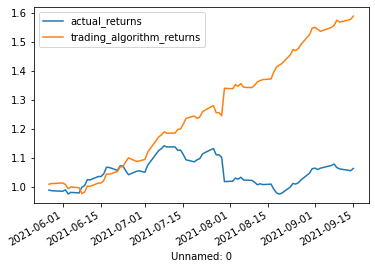

In [46]:
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["predicted_signal"] = gb_predictions
predictions_df["actual_returns"] = trading_df["actual_returns"]
predictions_df["trading_algorithm_returns"] = predictions_df["actual_returns"] * predictions_df["predicted_signal"]
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()